# Fraction of structures with breaks in connectivity
Here, we plot the fraction of structures with breaks in connectivity per phosphosite, depending on whether they are phosphorylated or not. Structures with breaks in connectivity are not taken into account for normal mode analysis.   

In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [38]:
base_path = Path("../results/nma_analysis_filtering")
subdirs = [x for x in base_path.iterdir() if x.is_dir()]

out_path = Path("nma_filtering")
out_path.mkdir(exist_ok=True)

In [12]:
psite_to_df = {}
for subdir in subdirs:
    psite = subdir.stem
    try:
        df = pd.read_csv(subdir / "structure_numbers.csv",index_col=0)
        psite_to_df[psite] = df
    except FileNotFoundError:
        print(f"Dataframe not found for {psite}")

In [25]:
fractions_df = []
columns = ["psite","phospho_fraction_filtered","nonphospho_fraction_filtered"]

for psite, df in psite_to_df.items():
    phospho_before = int(df.loc['phospho_before'])
    phospho_after = int(df.loc['phospho_after'])
    if phospho_after != 0:
        phospho_fraction_filtered = phospho_after / phospho_before
    else:
        phospho_fraction_filtered = 1
        
    nonphospho_before = int(df.loc['nonphospho_before'])
    nonphospho_after = int(df.loc['nonphospho_after'])
    if phospho_after != 0:
        nonphospho_fraction_filtered = nonphospho_after / nonphospho_before
    else:
        nonphospho_fraction_filtered = 1
    
    fractions_df.append([psite, phospho_fraction_filtered, nonphospho_fraction_filtered])
    

fractions_df = pd.DataFrame(fractions_df, columns=columns)


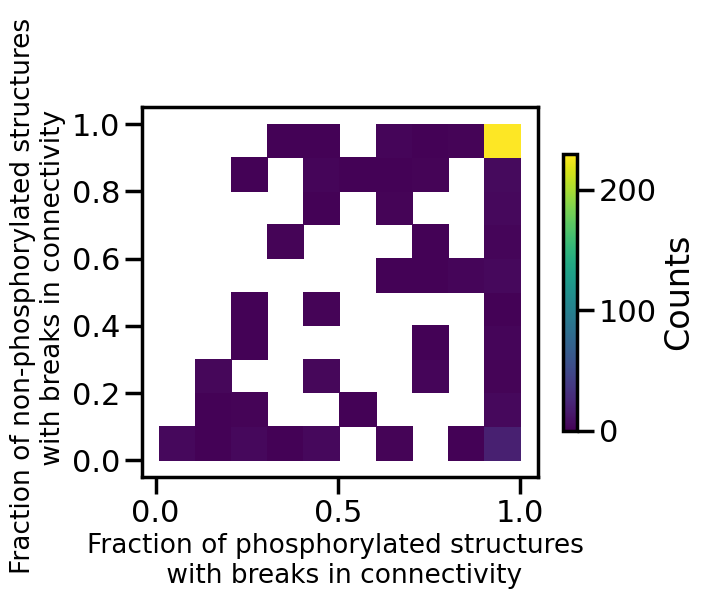

In [48]:
hist = sns.histplot(
    fractions_df, x="phospho_fraction_filtered", y="nonphospho_fraction_filtered",
    bins=10, discrete=(False, False), log_scale=(False, False),
    cbar=True, cbar_kws=dict(shrink=.75),cmap="viridis")

cbar = hist.collections[0].colorbar
cbar.set_label('Counts')

plt.xlabel("Fraction of phosphorylated structures \n with breaks in connectivity",fontsize=19)
plt.ylabel("Fraction of non-phosphorylated structures \n with breaks in connectivity",fontsize=19)
plt.savefig(out_path / "filtering_histogram.png",dpi=120,bbox_inches='tight')
